### RANSAC Python Code
    * 노이즈 데이터 생성. 노이즈 또한 랜덤하게 생성
    * p = 0.99, e = 0.5 인 조건에서 'sampling number' N을 구하고, 이 값을 max Iteration으로 사용
    * ```threshold``` 후보군을 오름차수능로 사용하여 early Stopping을 만족하는 threshold를 찾습니다.
    * 새로운 데이터를 생성한 다음에 앞에서 사용한 threshold와 early stopping을 이용하여 RANSAC이 유효하게 동작하는 지 확인 함


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [15]:
def get_sampling_number(sample_size, p=0.99, e=0.5):
    '''
    sample_size ; Number of sample size per every iterations
    p : Desired probability of choosing at least one sample free out outliers
    e : Estimated probability that a point is an outlier
    '''
    n_iterations_calcuated = math.ceil(math.log(1 - p) / math.log(1 - (1 - e) ** sample_size))
    print("Iteration 수  : ", n_iterations_calcuated)
    return n_iterations_calcuated

def get_inlier_threshold(thresholds, data, polynomial_degree, sample_size, min_iteration, max_iteration, stop_inlier_ratio, verbose=False):
    early_stop_flag = False
    inlier_threshold = None 
    for threshold in thresholds: 
        best_fit = None
        best_error = 0

        for i in range(max_iteration):
            subset = data[np.random.choice(len(data), sample_size, replace=False)] 
            x_sample, y_sample = subset[:, 0], subset[:, 1]

            p = np.polyfit(x_sample, y_sample, polynomial_degree)

            # error 
            y_pred=  np.polyval(p, X) # p의 다항계수를 가지고있는 다항식에 X 값들 (전체 데이터)의 결과값을 출력 
            error = np.abs(y - y_pred) 

            inliers = error < threshold 
            n_inliers = np.sum(inliers)

            if n_inliers > best_error: 
                print(f"Threshold : {threshold}, index : {i}, n_inliers: {n_inliers}")
                best_fit = p 

                if i > min_iteration and n_inliers/len(data) >= stop_inlier_ratio:
                    early_stop_flag = True 
                    inlier_threshold = threshold

            if early_stop_flag:
                break
             
        if verbose:
            y_best = np.polyval(best_fit, X) 
            
            plt.scatter(X, y, label="Data points")
            plt.plot(X, y_best, color='red', label='RANSAC fit')
            plt.legend()
            plt.show()

        if early_stop_flag:
            break
        
    return inlier_threshold
            

In [26]:
def get_model_with_ransac(data, polynomial_degree, thresholds, sample_size, min_iteration, max_iteration, stop_inlier_ratio, verbose=False):
    early_stop_flag = False
    inlier_threshold = None 
    for threshold in thresholds: 
        best_fit = None
        best_error = 0

        for i in range(max_iteration):
            subset = data[np.random.choice(len(data), sample_size, replace=False)] 
            x_sample, y_sample = subset[:, 0], subset[:, 1]

            p = np.polyfit(x_sample, y_sample, polynomial_degree)

            # error 
            y_pred=  np.polyval(p, X) # p의 다항계수를 가지고있는 다항식에 X 값들 (전체 데이터)의 결과값을 출력 
            error = np.abs(y - y_pred) 

            inliers = error < threshold 
            n_inliers = np.sum(inliers)

            if n_inliers > best_error: 
                print(f"Threshold : {threshold}, index : {i}, n_inliers: {n_inliers}")
                best_fit = p 

                if i > min_iteration and n_inliers/len(data) >= stop_inlier_ratio:
                    early_stop_flag = True 
                    inlier_threshold = threshold

            if early_stop_flag:
                break
             
        if verbose:
            y_best = np.polyval(best_fit, X) 
            
            plt.scatter(X, y, label="Data points")
            plt.plot(X, y_best, color='red', label='RANSAC fit')
            plt.legend()
            plt.show()

        if early_stop_flag:
            break
    
    return early_stop_flag, best_fit

In [22]:
np.random.seed(0)
n_points = 100 
X = np.linspace(0, 10, n_points)
y = 3 * X + 10 + np.random.normal(0, 3, n_points) 

n_outliers = 20 

X[-n_outliers:] += int(30 * np.random.rand())
y[-n_outliers:] -= int(50 - np.random.rand())
X = np.expand_dims(X, -1) 
y = np.expand_dims(y, -1)

data = np.hstack([X , y])

threshold_candidates = [1,2,4,8,16,32,64,128]
threshold_candidates.sort()

In [23]:
sample_size = 2 
max_iteration = get_sampling_number(sample_size) 


Iteration 수  :  17


Threshold : 1, index : 0, n_inliers: 13
Threshold : 1, index : 1, n_inliers: 11
Threshold : 1, index : 2, n_inliers: 5
Threshold : 1, index : 3, n_inliers: 3
Threshold : 1, index : 4, n_inliers: 11
Threshold : 1, index : 5, n_inliers: 13
Threshold : 1, index : 6, n_inliers: 15
Threshold : 1, index : 7, n_inliers: 6
Threshold : 1, index : 8, n_inliers: 7
Threshold : 1, index : 9, n_inliers: 5
Threshold : 1, index : 10, n_inliers: 21
Threshold : 1, index : 11, n_inliers: 6
Threshold : 1, index : 12, n_inliers: 10
Threshold : 1, index : 13, n_inliers: 7
Threshold : 1, index : 14, n_inliers: 8
Threshold : 1, index : 15, n_inliers: 20
Threshold : 1, index : 16, n_inliers: 5


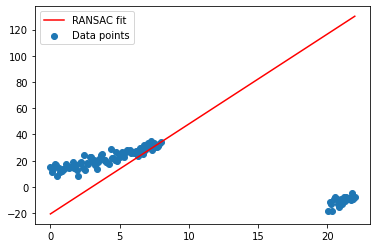

Threshold : 2, index : 0, n_inliers: 14
Threshold : 2, index : 1, n_inliers: 14
Threshold : 2, index : 2, n_inliers: 29
Threshold : 2, index : 3, n_inliers: 14
Threshold : 2, index : 4, n_inliers: 35
Threshold : 2, index : 5, n_inliers: 11
Threshold : 2, index : 6, n_inliers: 28
Threshold : 2, index : 7, n_inliers: 19
Threshold : 2, index : 8, n_inliers: 10
Threshold : 2, index : 9, n_inliers: 40
Threshold : 2, index : 10, n_inliers: 14
Threshold : 2, index : 11, n_inliers: 28
Threshold : 2, index : 12, n_inliers: 32
Threshold : 2, index : 13, n_inliers: 17
Threshold : 2, index : 14, n_inliers: 10
Threshold : 2, index : 15, n_inliers: 13
Threshold : 2, index : 16, n_inliers: 27


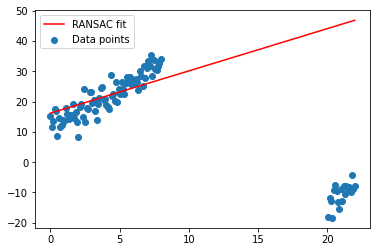

Threshold : 4, index : 0, n_inliers: 2
Threshold : 4, index : 1, n_inliers: 41
Threshold : 4, index : 2, n_inliers: 25
Threshold : 4, index : 3, n_inliers: 39
Threshold : 4, index : 4, n_inliers: 63


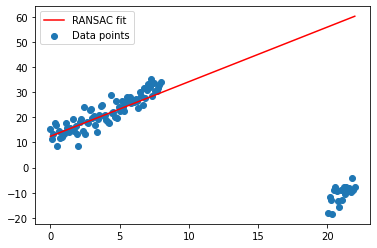

In [24]:
threshold = get_inlier_threshold(threshold_candidates, data, polynomial_degree=1, sample_size=sample_size, min_iteration=1, 
                                 max_iteration=max_iteration, stop_inlier_ratio=0.50, verbose=True)

Threshold : 1, index : 0, n_inliers: 12
Threshold : 1, index : 1, n_inliers: 10
Threshold : 1, index : 2, n_inliers: 8
Threshold : 1, index : 3, n_inliers: 12
Threshold : 1, index : 4, n_inliers: 2
Threshold : 1, index : 5, n_inliers: 7
Threshold : 1, index : 6, n_inliers: 14
Threshold : 1, index : 7, n_inliers: 12
Threshold : 1, index : 8, n_inliers: 7
Threshold : 1, index : 9, n_inliers: 16
Threshold : 1, index : 10, n_inliers: 11
Threshold : 1, index : 11, n_inliers: 24
Threshold : 1, index : 12, n_inliers: 23
Threshold : 1, index : 13, n_inliers: 3
Threshold : 1, index : 14, n_inliers: 15
Threshold : 1, index : 15, n_inliers: 7
Threshold : 1, index : 16, n_inliers: 7


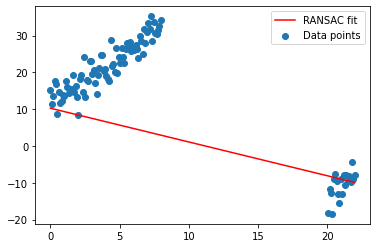

Threshold : 2, index : 0, n_inliers: 6
Threshold : 2, index : 1, n_inliers: 14
Threshold : 2, index : 2, n_inliers: 6
Threshold : 2, index : 3, n_inliers: 13
Threshold : 2, index : 4, n_inliers: 21
Threshold : 2, index : 5, n_inliers: 6
Threshold : 2, index : 6, n_inliers: 20
Threshold : 2, index : 7, n_inliers: 21
Threshold : 2, index : 8, n_inliers: 17
Threshold : 2, index : 9, n_inliers: 11
Threshold : 2, index : 10, n_inliers: 11
Threshold : 2, index : 11, n_inliers: 9
Threshold : 2, index : 12, n_inliers: 38
Threshold : 2, index : 13, n_inliers: 17
Threshold : 2, index : 14, n_inliers: 11
Threshold : 2, index : 15, n_inliers: 29
Threshold : 2, index : 16, n_inliers: 39


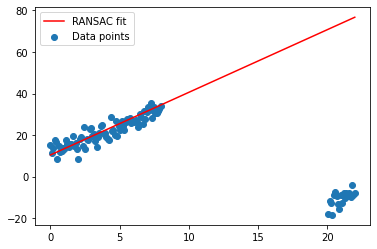

Threshold : 4, index : 0, n_inliers: 12
Threshold : 4, index : 1, n_inliers: 50
Threshold : 4, index : 2, n_inliers: 29
Threshold : 4, index : 3, n_inliers: 66
Threshold : 4, index : 4, n_inliers: 42
Threshold : 4, index : 5, n_inliers: 65
Threshold : 4, index : 6, n_inliers: 46
Threshold : 4, index : 7, n_inliers: 20
Threshold : 4, index : 8, n_inliers: 14
Threshold : 4, index : 9, n_inliers: 32
Threshold : 4, index : 10, n_inliers: 63
Threshold : 4, index : 11, n_inliers: 37
Threshold : 4, index : 12, n_inliers: 61
Threshold : 4, index : 13, n_inliers: 15
Threshold : 4, index : 14, n_inliers: 23
Threshold : 4, index : 15, n_inliers: 59
Threshold : 4, index : 16, n_inliers: 18


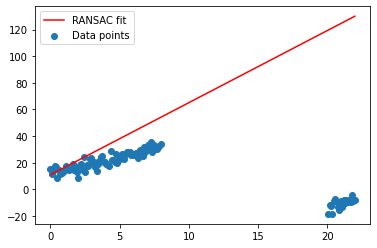

Threshold : 8, index : 0, n_inliers: 58
Threshold : 8, index : 1, n_inliers: 15
Threshold : 8, index : 2, n_inliers: 56
Threshold : 8, index : 3, n_inliers: 42
Threshold : 8, index : 4, n_inliers: 50
Threshold : 8, index : 5, n_inliers: 77


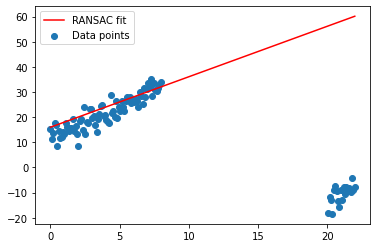

In [28]:
early_stopping_success, param = get_model_with_ransac(data, polynomial_degree=1, thresholds=threshold_candidates, sample_size=sample_size,
                                                      min_iteration=1, max_iteration=max_iteration, stop_inlier_ratio=0.7, verbose=True)

In [29]:
print(early_stopping_success, param)

True [ 2.00468072 16.00482317]
